# TP 3 - Differential Privacy - Case Study
***Binôme Stéphanie ROUXEL & Hy-Boui CHANG***

Juillet 2020

# Case Study - Health Care dataset

In this notebook, we'll explore the possibilties for data privacy on a new dataset.
Your challenge is that you are working with a health care provider, who would like to do the "machine learning" on this dataset to figure out if there are preventative measures that can be taken so fewer patients are seen in the hospital for related care or so that their visits are shorter, to do so you might want to predict the **has_diabetes** according to the features at hand. The goal is that more potentially affected patients are given access to primary care physicians and regular medication or visits that can keep them out of the hostpital for long stays.

## Part One: Determining What's Useful and What's Sensitive

- Data completeness
- Potential sensitive columns
- Potential useful features
- What columns should we use? 
- Which ones should we remove?
- Are there columns which we should protect but not remove? 

For each, we need some justification or thought!

In [ ]:
%matplotlib inline
import pandas as pd


The 2 following cells are for connexion to "google drive" where are located "health_data.csv"

In [ ]:
#si google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# si drive de SR
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projet/health_data.csv')

# si drive de hbc : 
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projet_S1_TP3_HealthData/health_data.csv')

The following cell is for file "health_data.csv" in local location into the computer.

In [ ]:
# si fichier source en local : 
df = pd.read_csv('data/health_data.csv')

In [ ]:
df.head()

,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,id,insulin,marital_status,no_primary_dr,patient_name,private_insurance,released_sameday,ssn,symptom_code
0,2018-05-09 12:06:28,49,1,108,99,1,district,15,6,1000,1,single,False,Rachel Shelton,0,0,743-97-4081,4
1,2018-05-12 10:02:55,82,1,70,100,1,general,22,1,1001,1,married,False,Barbara Medina,0,0,698-10-2230,3
2,2018-05-13 12:25:17,71,1,100,78,1,northern,1,4,1002,1,no_answer,True,Kaitlyn Daniels,0,1,540-83-4297,2
3,2018-05-14 12:20:08,87,0,113,72,1,general,22,4,1003,1,no_answer,False,William Reyes,1,0,282-96-8755,0
4,2018-05-17 08:35:23,53,1,93,80,1,district,17,8,1004,0,no_answer,True,Eric Booth,0,0,130-25-8918,8


## 1.a. Exploration of given dataset


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
admitted_ts              1000 non-null object
age                      1000 non-null int64
ambulance_call           1000 non-null int64
blood_sugar_reading      1000 non-null int64
days_since_last_visit    1000 non-null int64
has_diabetes             1000 non-null int64
hospital                 1000 non-null object
hours_hospitalized       1000 non-null int64
hydration_level          1000 non-null int64
id                       1000 non-null int64
insulin                  1000 non-null int64
marital_status           1000 non-null object
no_primary_dr            1000 non-null bool
patient_name             1000 non-null object
private_insurance        1000 non-null int64
released_sameday         1000 non-null int64
ssn                      1000 non-null object
symptom_code             1000 non-null int64
dtypes: bool(1), int64(12), object(5)
memory usage: 133.9+ KB


,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hours_hospitalized,hydration_level,id,insulin,private_insurance,released_sameday,symptom_code
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.22100,0.504000,109.108000,59.778000,0.754000,10.928000,4.566000,1499.500000,0.492000,0.475000,0.354000,4.586000
std,20.69663,0.500234,22.908014,23.054853,0.430894,6.322087,2.879225,288.819436,0.500186,0.499624,0.478448,2.892226
min,16.00000,0.000000,70.000000,20.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,35.00000,0.000000,90.000000,39.000000,1.000000,6.000000,2.000000,1249.750000,0.000000,0.000000,0.000000,2.000000
50%,51.00000,1.000000,109.000000,60.000000,1.000000,11.000000,5.000000,1499.500000,0.000000,0.000000,0.000000,4.000000
75%,70.25000,1.000000,128.000000,80.000000,1.000000,16.000000,7.000000,1749.250000,1.000000,1.000000,1.000000,7.000000
max,88.00000,1.000000,149.000000,100.000000,1.000000,22.000000,9.000000,1999.000000,1.000000,1.000000,1.000000,9.000000


We have 1000 lines of data, which is a small dataset, but suffisant to get good result with a prediction algorythm.

In [ ]:
print("The data set dimensions are : {}".format(df.shape))


The data set dimensions are : (1000, 18)


In [ ]:
df.groupby('has_diabetes').size()


has_diabetes
0    246
1    754
dtype: int64

Remark : our dataset is unbalanced

In [ ]:
df.corr()['has_diabetes']

age                     -0.004673
ambulance_call           0.013858
blood_sugar_reading     -0.003593
days_since_last_visit    0.012534
has_diabetes             1.000000
hours_hospitalized      -0.061627
hydration_level          0.063124
id                      -0.015041
insulin                  0.018726
no_primary_dr            0.069018
private_insurance       -0.070442
released_sameday         0.053818
symptom_code             0.000125
Name: has_diabetes, dtype: float64

The biggest correlations with **'has_diabetes'** are **no_primary_dr** and **private_insurance** (anti-correlation : diabetics people dont have private insurance mostly).

Conclusion : Later in this TP, we will apply "confidential privacy" to these 2 features, in addition to "has_diabete" label.

In [ ]:
df.no_primary_dr.value_counts()

False    591
True     409
Name: no_primary_dr, dtype: int64

In [ ]:
df.private_insurance.value_counts()

0    525
1    475
Name: private_insurance, dtype: int64

In [ ]:
df.marital_status.value_counts()

married      272
single       255
divorced     254
no_answer    219
Name: marital_status, dtype: int64

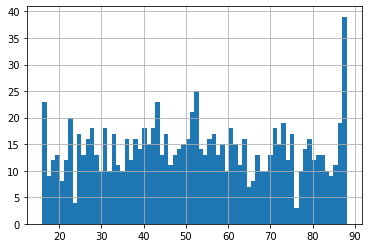

In [ ]:
df.age.hist(bins=70)

We get 9 different symptom codes.

In [ ]:
df.groupby('symptom_code').size()

symptom_code
0    101
1     83
2     98
3    107
4    117
5     97
6     83
7     89
8    113
9    112
dtype: int64

In [ ]:
df.groupby(['has_diabetes','symptom_code']).size()


has_diabetes  symptom_code
0             0               22
              1               22
              2               27
              3               29
              4               24
              5               26
              6               20
              7               19
              8               27
              9               30
1             0               79
              1               61
              2               71
              3               78
              4               93
              5               71
              6               63
              7               70
              8               86
              9               82
dtype: int64

Is there a link between "has diabet" and the "symptom code" ?
We can say that code 4 is particularly present for diabetic people.

Now look at the data distribution. We need to filter to numeric data only.

- sugar and insulim are both important for diabete
- patients without private insurance tend to has diabete


has_diabetes
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

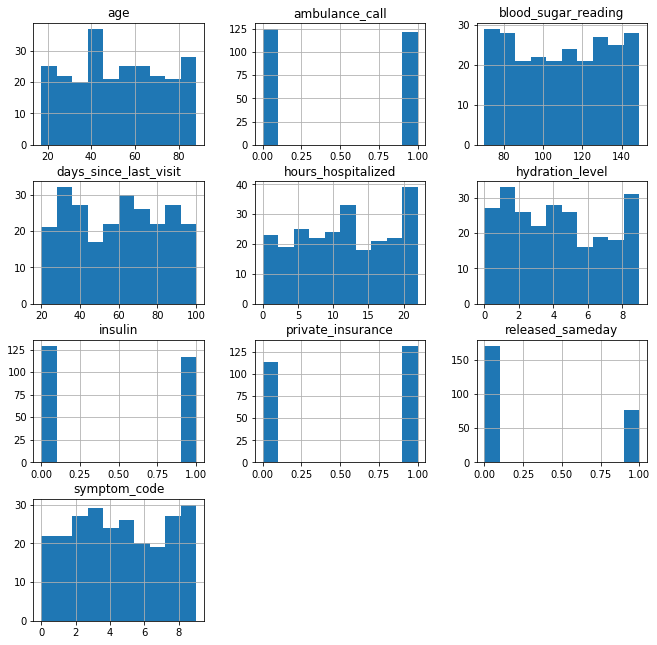

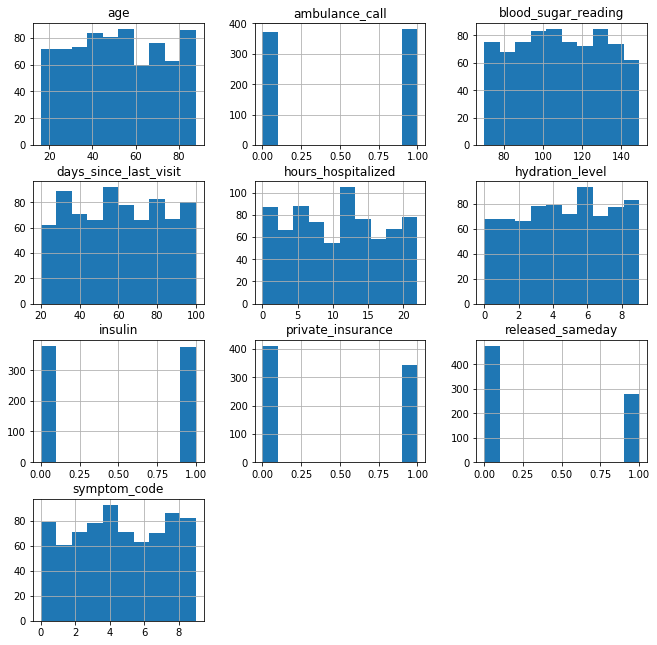

In [ ]:
df_num = df.drop(columns=['admitted_ts', 'hospital', 'id', 'marital_status','no_primary_dr', 'patient_name', 'ssn'])
df_num.groupby('has_diabetes').hist(figsize=(18-7,18-7))

Now lets look at the data quality. Are every line filled ? Is there any missing data ?

In [ ]:
df.isnull().sum()

admitted_ts              0
age                      0
ambulance_call           0
blood_sugar_reading      0
days_since_last_visit    0
has_diabetes             0
hospital                 0
hours_hospitalized       0
hydration_level          0
id                       0
insulin                  0
marital_status           0
no_primary_dr            0
patient_name             0
private_insurance        0
released_sameday         0
ssn                      0
symptom_code             0
dtype: int64

In [ ]:
df.isna().sum()

admitted_ts              0
age                      0
ambulance_call           0
blood_sugar_reading      0
days_since_last_visit    0
has_diabetes             0
hospital                 0
hours_hospitalized       0
hydration_level          0
id                       0
insulin                  0
marital_status           0
no_primary_dr            0
patient_name             0
private_insurance        0
released_sameday         0
ssn                      0
symptom_code             0
dtype: int64

Then, lets verify if there are some outliers data and numerical data
- first for non-diabetic people

,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hours_hospitalized,hydration_level,insulin,private_insurance,released_sameday,symptom_code
count,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,52.390244,0.491870,109.252033,59.272358,0.0,11.609756,4.247967,0.475610,0.536585,0.308943,4.585366
std,20.344436,0.500953,24.257831,23.372123,0.0,6.481539,2.971891,0.500423,0.499676,0.463000,2.900885
min,17.000000,0.000000,70.000000,20.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,87.250000,38.000000,0.0,6.000000,2.000000,0.000000,0.000000,0.000000,2.000000
50%,51.000000,0.000000,110.000000,61.500000,0.0,12.000000,4.000000,0.000000,1.000000,0.000000,4.000000
75%,70.000000,1.000000,129.750000,79.000000,0.0,17.000000,7.000000,1.000000,1.000000,1.000000,7.000000
max,88.000000,1.000000,149.000000,100.000000,0.0,22.000000,9.000000,1.000000,1.000000,1.000000,9.000000


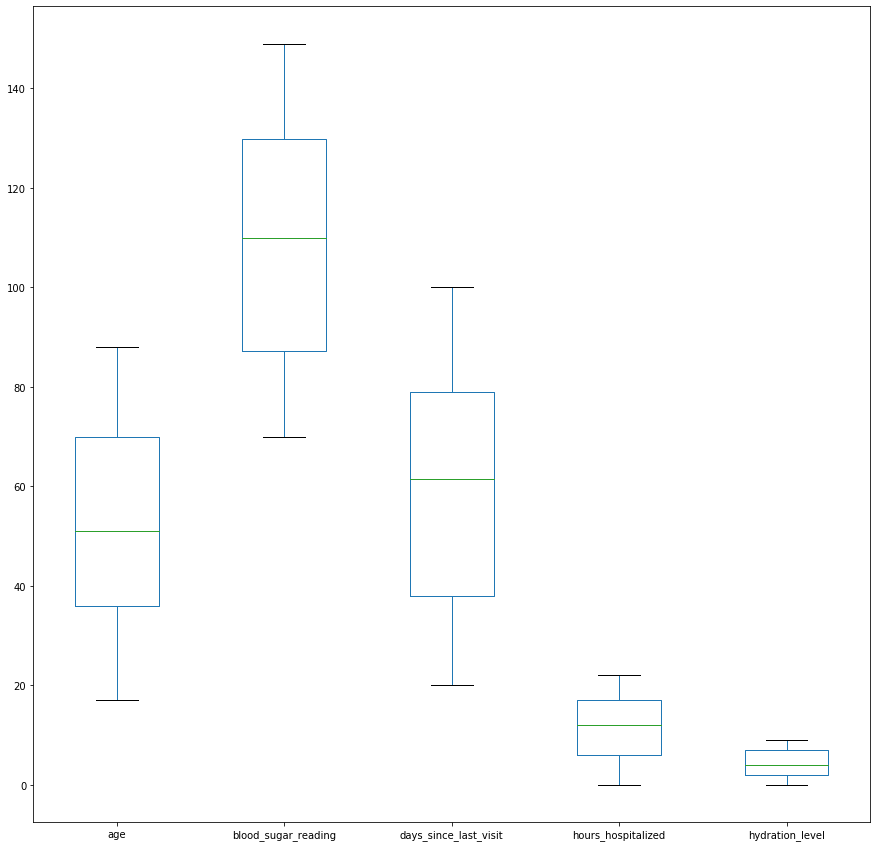

In [ ]:
mask_diabete=df_num['has_diabetes'] == 1
df_num_no_diabete=df_num[~mask_diabete]
df_num_no_diabete[['age','blood_sugar_reading','days_since_last_visit','hours_hospitalized','hydration_level']].plot(kind="box",figsize=(25-10,25-10)) 
df_num_no_diabete.describe()

- then for diabetic people

,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hours_hospitalized,hydration_level,insulin,private_insurance,released_sameday,symptom_code
count,754.000000,754.000000,754.000000,754.000000,754.0,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,52.165782,0.507958,109.061008,59.942971,1.0,10.705570,4.669761,0.497347,0.454907,0.368700,4.586207
std,20.823303,0.500269,22.466655,22.963640,0.0,6.257493,2.842658,0.500325,0.498293,0.482773,2.891324
min,16.000000,0.000000,70.000000,20.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,90.000000,40.000000,1.0,5.000000,2.000000,0.000000,0.000000,0.000000,2.000000
50%,51.000000,1.000000,109.000000,59.000000,1.0,11.000000,5.000000,0.000000,0.000000,0.000000,4.000000
75%,71.000000,1.000000,128.000000,80.000000,1.0,16.000000,7.000000,1.000000,1.000000,1.000000,7.000000
max,88.000000,1.000000,149.000000,100.000000,1.0,22.000000,9.000000,1.000000,1.000000,1.000000,9.000000


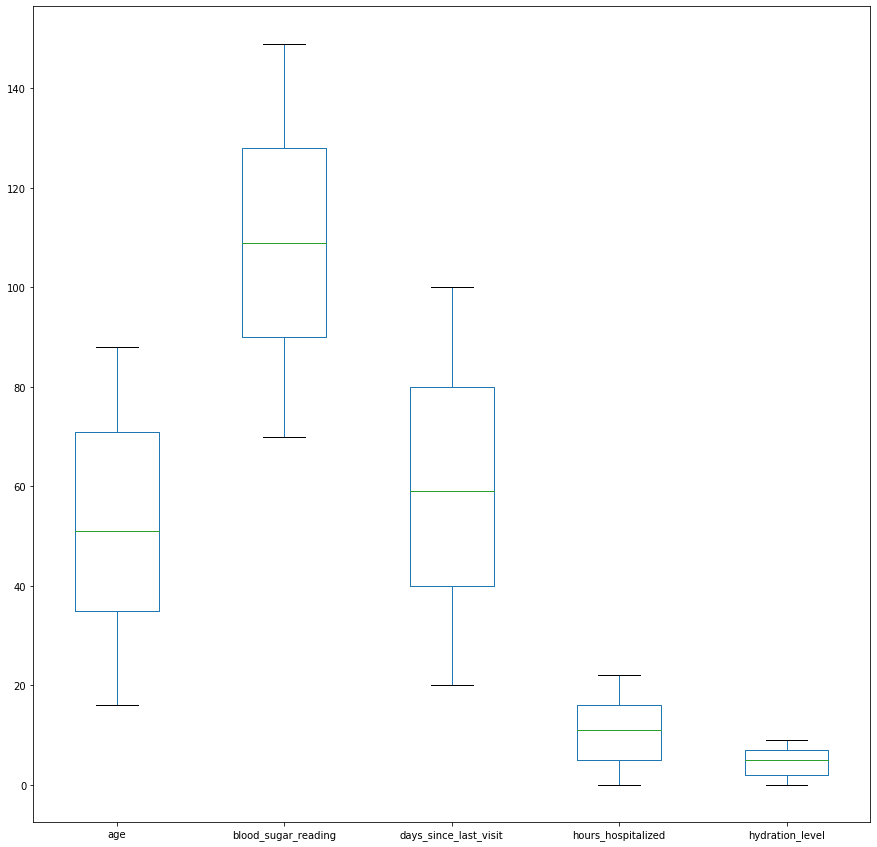

In [ ]:
mask_diabete=df_num['has_diabetes'] == 1
df_num_diabete=df_num[mask_diabete]
df_num_diabete[['age','blood_sugar_reading','days_since_last_visit','hours_hospitalized','hydration_level']].plot(kind="box",figsize=(25-10,25-10))
df_num_diabete.describe()

1.b. Signification of fields and choices

Ces définitions nous aideront à choisir les champs utiles et/ou sensibles.


- admitted_ts : date de la consultation médicale
- age : âge du patient
- ambulance_call = valeur binaire, donne l'indication si le patient est venu en ambulance ou pas
- blood sugar reading : taux de sucre dans le sang
- days_since_last_visit : date de dernière visite médicale
- has_diabetes : valeur binaire, donne la confirmation du diabete ou pas
- hospital : information de localisation / type d'hôpital
- hours_hospitalized : durée de l'hospitalisation en heures
- hydration_level : niveau d'hydratation du patient
- id : numéro d'identifiant associé de manière unique au patient
- insulin : valeur binaire, le patient prend de l'insuline (diabete) ou pas
- marital_status : le patient est-il marié, célibataire ou inconnu
- no_primary_dr : pas de médecin traitant, c'est souvent lié à la condition sociale du patient et/ou au fait que le patient ait une maladie de long terme.
- patient_name : nom du patient
- private_insurance : valeur binaire, est-ce que le patient possède un police d'assurance
- released_sameday : valeur binaire, est-ce que le patient est sortie le jour même de l'hopital? C'est donc en lien avec la gravité de la maladie, ou en lien avec le fait que le patient ait ou non une assurance. 
- ssn : Social Security Number, c'est le numéro de sécurité sociale
- symptom_code : c'est le code technique du symptome observé

>What columns should we use?
>Which ones should we remove?
>Are there columns which we should protect but not remove?

Looking at the information provided into this dataset, 

1. To determine which columns that we should use, we have annoted the list of columns and give : 

*  priority 0 for columns that seems useless 
*  priority 1 for very important column
*  priority 2 for columns we thinks may be usefull for our analysis

----


* admitted_ts              2
* age                      2
* ambulance_call           2
* blood_sugar_reading      1
* days_since_last_visit    2
* has_diabetes             1
* hospital                 2
* hours_hospitalized       2
* hydration_level          1
* id                       ?
* insulin                  1
* marital_status           0
* no_primary_dr            1 (we have seen earlier a correlation with has_diabetes)
* patient_name             0
* private_insurance        1  (we have seen earlier a correlation with has_diabetes)
* released_sameday         2
* ssn                      0
* symptom_code             1 (we have seen earlier the code 4 related to has_diabetes



2. Columns that we should remove ?

3 columns are sensitives and can help anyone to identify the right person :


* the id (single reference to a particular person)
* le patient_name (obvious)
* the ssn (which stands for Social Security Number, this nine-digit is used by the U.S. government for all U.S. citizens to keep track of their lifetime earnings and the number of years worked)

These 3 informations is useless for the determination of "has diabete" or "has not diabete".
We can then totally remove them without any consequence for our algorythm of prediction.

3. Columns that we should protect but not remove : 

among the priority 1, we think that **no_primary doctor** and **private_insurance** should be protected


In [ ]:
cols_to_drop = ['id', 'patient_name', 'ssn']

df_dropped = df.drop(columns=cols_to_drop)
df_dropped.columns

Index(['admitted_ts', 'age', 'ambulance_call', 'blood_sugar_reading',
       'days_since_last_visit', 'has_diabetes', 'hospital',
       'hours_hospitalized', 'hydration_level', 'insulin', 'marital_status',
       'no_primary_dr', 'private_insurance', 'released_sameday',
       'symptom_code'],
      dtype='object')

## Part Two: Determining the Approach for Protecting the Columns

You are the database manager at the health care provider asked to prepare the data to send to a machine learning consultant who will help give you a more detailed analysis. The consultant has signed all the necessary NDAs, but you have instructions to keep the private or potentially sensitive data to a minimum.

Based on the scenario and what you learned

- What methods will be most effective? 
- Have you considered potential data leakage within the *non-sensitive* columns?
- Is there other sensitive or secret data we should address?

**Our proposition** :

We can distinguish different ways of privacy protection.

+ The simple solution enables to keep good quality is to remove all sensitive columns not usefull for the model.

+ then, for fields that are sensitive but usefull for the analysis, we can apply k-anonymity with T-closeness. This implies a good knowledge of the data. The K-anonymity does not ensure 100% trustworthly, but this solution can be acceptable because the consultant has signed a NDA.

+ In case the K-anonymity with T-closeness is not sufficient, we can swich to differential privacy method. This last method is better to ensure privacy to people.


## Part Three: Implement Data Protection for the Dataset

Now it's time to code! Feel free to utilize code from the previous notebooks to implement protection of at least two of the columns you chose as sensitive. 

- What was difficult to decide and implement?
- How might this relate to real problems in machine learning with sensitive data? 



Here, we decide to use the second method of "confidential privacy" that is more robust to keep data private for people.

- For probability 1−p, we will let the value of of column "has_diabetes",
- For probability p, we will have 2 outputs :
    with probability q, we will replace the value by 0 (no diabete) ;
    with probability 1-q, we will replace the value by 1 (diabete)
    


As the TP 2, we will first import all necessary libraries.

In [ ]:

import numpy as np
import random

# Then here, we define the function

def process_value(value, p, q):

    rv = random.random()
    if rv <= p:
        #we return a random value
        rv = random.random()
        if rv <= q:
            return 0
        return 1
    else:
        return value



Let's start with the value of p and q equal to the value in TP2.

In [ ]:

p = 0.5
q = 0.5


**The first field that is sensitive is "has_diabetes".**
This is sensitive data in a privacy point of view, but cannot be remove from our dataset, because we need this value to train our algorithm.

We will apply our function **"process_value"** on it and get **"has_diabetes_modified"**

In [ ]:
values = []

for i, x in enumerate(df_dropped['has_diabetes']):
    values.append(process_value(x, p, q))

df_dropped['has_diabetes_modified'] = np.array(values)

df_dropped.head(10)

,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,insulin,marital_status,no_primary_dr,private_insurance,released_sameday,symptom_code,has_diabetes_modified
0,2018-05-09 12:06:28,49,1,108,99,1,district,15,6,1,single,False,0,0,4,1
1,2018-05-12 10:02:55,82,1,70,100,1,general,22,1,1,married,False,0,0,3,1
2,2018-05-13 12:25:17,71,1,100,78,1,northern,1,4,1,no_answer,True,0,1,2,1
3,2018-05-14 12:20:08,87,0,113,72,1,general,22,4,1,no_answer,False,1,0,0,1
4,2018-05-17 08:35:23,53,1,93,80,1,district,17,8,0,no_answer,True,0,0,8,0
5,2018-05-18 12:13:50,41,0,83,21,1,central,13,8,1,divorced,False,1,0,6,1
6,2018-05-21 08:06:34,29,1,116,76,1,district,7,8,0,single,False,1,1,4,0
7,2018-05-23 09:45:05,84,0,118,44,1,northern,16,5,0,single,True,0,0,1,1
8,2018-05-26 10:33:57,81,0,109,58,0,district,17,4,1,no_answer,False,1,0,0,0
9,2018-05-31 08:44:29,38,1,138,57,1,district,22,8,1,divorced,True,0,0,6,1


Let's see "before" privacy applied on the dataset :

In [ ]:

print("Before privacy applied, the data distribution of people having diabete is :")
df_dropped.has_diabetes.value_counts()


Before privacy applied, the data distribution of people having diabete is :


1    754
0    246
Name: has_diabetes, dtype: int64

Let's see "after" privacy applied on the dataset :

In [ ]:

print("After privacy applied, the data distribution of people having diabete is :")
df_dropped.has_diabetes_modified.value_counts()

After privacy applied, the data distribution of people having diabete is :


1    633
0    367
Name: has_diabetes_modified, dtype: int64

**The second field that we choose to apply the technic of differential policy is "no_primary_dr".**
This is also sensitive data in a privacy point of view, as often patient without primary doctor has diabete.
We cannot remove this information from our dataset, because we need this value to train our algorithm.

We will apply our function **"process_value"** on it and get **"no_primary_dr_modified"**.

In [ ]:
values = []

for i, x in enumerate(df_dropped['no_primary_dr']):
    values.append(process_value(x, p, q))

df_dropped['no_primary_dr_modified'] = np.array(values)

print("")
print("\nBefore privacy applied, the data distribution of people with status 'no_primary_dr' is :\n", df_dropped.no_primary_dr.value_counts())
print("")
print("\nAfter privacy applied, the data distribution of people with status 'no_primary_dr' is :\n", df_dropped.no_primary_dr_modified.value_counts())




Before privacy applied, the data distribution of people with status 'no_primary_dr' is :
 False    591
True     409
Name: no_primary_dr, dtype: int64


After privacy applied, the data distribution of people with status 'no_primary_dr' is :
 0    528
1    472
Name: no_primary_dr_modified, dtype: int64


In [ ]:
df_dropped.head(10)

,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,insulin,marital_status,no_primary_dr,private_insurance,released_sameday,symptom_code,has_diabetes_modified,no_primary_dr_modified,private_insurance_modified
0,2018-05-09 12:06:28,49,1,108,99,1,district,15,6,1,single,False,0,0,4,1,0,0
1,2018-05-12 10:02:55,82,1,70,100,1,general,22,1,1,married,False,0,0,3,1,0,1
2,2018-05-13 12:25:17,71,1,100,78,1,northern,1,4,1,no_answer,True,0,1,2,1,1,0
3,2018-05-14 12:20:08,87,0,113,72,1,general,22,4,1,no_answer,False,1,0,0,1,0,1
4,2018-05-17 08:35:23,53,1,93,80,1,district,17,8,0,no_answer,True,0,0,8,0,1,0
5,2018-05-18 12:13:50,41,0,83,21,1,central,13,8,1,divorced,False,1,0,6,1,1,0
6,2018-05-21 08:06:34,29,1,116,76,1,district,7,8,0,single,False,1,1,4,0,0,1
7,2018-05-23 09:45:05,84,0,118,44,1,northern,16,5,0,single,True,0,0,1,1,1,0
8,2018-05-26 10:33:57,81,0,109,58,0,district,17,4,1,no_answer,False,1,0,0,0,0,1
9,2018-05-31 08:44:29,38,1,138,57,1,district,22,8,1,divorced,True,0,0,6,1,1,0


We also apply protection on our third fiel : **private_insurance**

In [ ]:
values = []

for i, x in enumerate(df_dropped['private_insurance']):
    values.append(process_value(x, p, q))

df_dropped['private_insurance_modified'] = np.array(values)

df_dropped.head(10)

print("")
print("\nBefore privacy applied, the data distribution of people with status 'private_insurance' is :\n", df_dropped.private_insurance.value_counts())
print("")
print("\nAfter privacy applied, the data distribution of people with status 'private_insurance' is :\n", df_dropped.private_insurance_modified.value_counts())




Before privacy applied, the data distribution of people with status 'private_insurance' is :
 0    525
1    475
Name: private_insurance, dtype: int64


After privacy applied, the data distribution of people with status 'private_insurance' is :
 1    503
0    497
Name: private_insurance_modified, dtype: int64


## Bonus: machine learning from anonymized Dataset

Build a model that predicts the the diabetes statue of a new patient based on the anonymized database from part three. Compare with non anonymized dataset. (try to get more than 0.65 accuracy)

In order to apply a model to predict the diabetes statue, we nee first to convert all string (categorical) data into numerical data. To do so, we will use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df_dropped['hospital'] = number.fit_transform(df_dropped['hospital'].astype('str'))
df_dropped['hospital']

0      1
1      2
2      3
3      2
4      1
      ..
995    2
996    0
997    1
998    0
999    3
Name: hospital, Length: 1000, dtype: int32

In [ ]:
df_dropped['marital_status'] = number.fit_transform(df_dropped['marital_status'].astype('str'))
df_dropped['marital_status']

0      3
1      1
2      2
3      2
4      2
      ..
995    0
996    2
997    1
998    3
999    2
Name: marital_status, Length: 1000, dtype: int32

In [ ]:
df_dropped['has_diabetes'] = number.fit_transform(df_dropped['has_diabetes'].astype('str'))
df_dropped['has_diabetes']

df_dropped['has_diabetes_modified'] = number.fit_transform(df_dropped['has_diabetes_modified'].astype('str'))
df_dropped['has_diabetes_modified']

0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    1
997    1
998    0
999    1
Name: has_diabetes_modified, Length: 1000, dtype: int32

## First on real data

We will train our model using scikit learn.
Lets first train on the real data (data not modified, so not yet private).

**Balanced data**

We have seen from previous calculation that our original dataset is unbalanced : 754 has diabete, and 246 do not have diabete.

To train correctly our algorithm, we need to first balance our dataset. This is necessary because any machine learning algorithms are designed to maximize overall accuracy by default.

The lower quantity is 246 for people that do not have diabete.
We will shuffle the entire dataset, then extract 246 lines of "has diabetes" and 246 line of "has no diabetes".

First, we'll separate observations from each class into different DataFrames.
Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.

Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [ ]:
# situation before balance process
print("les données avant l'équilibre sont : ")
print(df_dropped.has_diabetes.value_counts())
print("")

# Separate majority and minority classes
df_majority = df_dropped[df_dropped.has_diabetes==1]
df_minority = df_dropped[df_dropped.has_diabetes==0]
 
# Downsample majority class

from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=246,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_dropped_equil = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print("les données après l'équilibrage sont : ")
print(df_dropped_equil.has_diabetes.value_counts())

les données avant l'équilibre sont : 
1    754
0    246
Name: has_diabetes, dtype: int64

les données après l'équilibrage sont : 
1    246
0    246
Name: has_diabetes, dtype: int64


**Split between training and test set**

Now that our dataset is balanced, we will define training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# input features
feature_columns = ['age', 'ambulance_call', 'blood_sugar_reading', 'days_since_last_visit', 'hospital', 'hours_hospitalized', 'hydration_level', 'insulin', 'marital_status', 'no_primary_dr', 'private_insurance', 'released_sameday', 'symptom_code']
X = df_dropped[feature_columns].values

# output target, original
predicted_class = ['has_diabetes']
y = df_dropped[predicted_class].values

# split of 30%, on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [ ]:
# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model setting**

We chose here the random forest classifier.

In [ ]:
# we choose to use Random Forest to classify

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)
# random_forest_model = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 6, max_features = 'auto', random_state=0)


In [ ]:
# let fit the model than calculate the accuracy

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**Metrics**

Lets see how well perform our Random Forest model on real data.

In [ ]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy = 0.710


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
round(roc_auc_score(y_test,y_pred),5)

TP - True Negative 12
FP - False Positive 53
FN - False Negative 34
TP - True Positive 201
Accuracy Rate: 0.71
Misclassification Rate: 0.29


0.51997

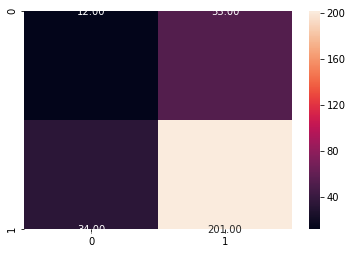

In [ ]:
# Visualisation de la confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt=".2f")

## Secondly on modified data

Now that we get the accuracy from real data, lets see how the differential privacy impacts the accuracy.
Recall that we have apply confidential policy to 2 fields (in addition to the label **"has_diabete"**) : **"no_primary_dr"** and **"private_insurance"**.


In [ ]:
# we will now re-do exactly the same model on the data with privacy apply.
# recall that our data modified are with p = q = 0.5

########## step 1 : balance the data

# situation before balance process
print("les données avant l'équilibre sont : ")
print(df_dropped.has_diabetes_modified.value_counts())
print("")

# Separate majority and minority classes
df_majority = df_dropped[df_dropped.has_diabetes_modified==1]
df_minority = df_dropped[df_dropped.has_diabetes_modified==0]
 
# Downsample majority class

from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=347,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_dropped_equil = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print("les données après l'équilibrage sont : ")
print(df_dropped_equil.has_diabetes_modified.value_counts())


########## step 2 : split the data between training and testing set

# from sklearn.model_selection import train_test_split

# input features 
# we need here to use the "no_primary_dr_modified" field instead of "no_primary_dr"
# we need here to use the "private_insurance_modified" field instead of "private_insurance"
feature_columns = ['age', 'ambulance_call', 'blood_sugar_reading', 'days_since_last_visit', 'hospital', 'hours_hospitalized', 'hydration_level', 'insulin', 'marital_status', 'no_primary_dr_modified', 'private_insurance_modified', 'released_sameday', 'symptom_code']
X = df_dropped_equil[feature_columns].values

# output target, original (we need here to use the "has_diabetes_modified" field instead of "has_diabetes")
predicted_class_modified = ['has_diabetes_modified']
y_modified = df_dropped_equil[predicted_class_modified].values

# split of 30%, on original data
X_train, X_test, y_train_modified, y_test_modified = train_test_split(X, y_modified, test_size = 0.30, random_state=10)


########## step 3 : let fit the model than calculate the accuracy

random_forest_model.fit(X_train, y_train_modified)
y_pred_modified = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test_modified, y_pred_modified)))

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test_modified, y_pred_modified)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
round(roc_auc_score(y_test_modified,y_pred_modified),5)

les données avant l'équilibre sont : 
1    633
0    367
Name: has_diabetes_modified, dtype: int64

les données après l'équilibrage sont : 
0    367
1    347
Name: has_diabetes_modified, dtype: int64
Accuracy = 0.484
TP - True Negative 67
FP - False Positive 36
FN - False Negative 75
TP - True Positive 37
Accuracy Rate: 0.48372093023255813
Misclassification Rate: 0.5162790697674419


C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.49042

>Here with confidential privacy applied to 3 fields ("has_diabetes", "no_primary-dr" and "private_insurance"), we have very poor accuracy. Here we get 48% only.
>Lets's find the parameters to improve the accuracy, our goal is to reach 65%.

In [ ]:
# we will try different values


######## STEP 1 : import librairies ########

#print("Import of all necessary libraries.")

%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

######## STEP 2 : chargement données d'entrée ########

#print("Chargement des données.")

# si drive de SR
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/projet/health_data.csv')

#Si HBC
df = pd.read_csv('data/health_data.csv')
#df.head()
#df.info()
#df.describe()


######## STEP 3 : supression des données sensibles et inutiles pour l'algo de prédiction ########

#print("Suppression des colonnes inutiles")

cols_to_drop = ['id', 'patient_name', 'ssn']

df_dropped = df.drop(columns=cols_to_drop)
df_dropped.columns


######## STEP 4 : numérisation de toutes les colonnes du dataset ########

number = LabelEncoder()

df_dropped['hospital'] = number.fit_transform(df_dropped['hospital'].astype('str'))
df_dropped['hospital']

df_dropped['marital_status'] = number.fit_transform(df_dropped['marital_status'].astype('str'))
df_dropped['marital_status']

df_dropped['no_primary_dr'] = number.fit_transform(df_dropped['no_primary_dr'].astype('str'))
df_dropped['no_primary_dr']


######## STEP 5 : création de la function qui ajoute la confidential privacy et application ########

#print("Création de la fonction PROCESS VALUE qui va modifier une partie des données d'origine.")

import numpy as np
import random

# Then here, wi define the function

def process_value(value, p, q):

    rv = random.random()
    if rv <= p:
        #we return a random value
        rv = random.random()
        if rv <= q:
            return 0
        return 1
    else:
        return value

accuracy_list=[]

for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for q in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        
        # ajout de colonnes avec p et q différents
        values = []
        for i, x in enumerate(df_dropped['has_diabetes']):
            values.append(process_value(x, p, q))
        df_dropped[f"has_diabetes_{p}_{q}"] = np.array(values)

        
        values2 = []
        for i, x in enumerate(df_dropped['no_primary_dr']):
            values2.append(process_value(x, p, q))
        df_dropped[f"no_primary_dr_{p}_{q}"] = np.array(values2)      

        values3 = []
        for i, x in enumerate(df_dropped['private_insurance']):
            values3.append(process_value(x, p, q))
        df_dropped[f"private_insurance_{p}_{q}"] = np.array(values3)  
        
        # Equilibrage des données 
   
        predicted_class_modified = [f"has_diabetes_{p}_{q}"]

        df_A = df_dropped[df_dropped[f"has_diabetes_{p}_{q}"]==1]
        df_B = df_dropped[df_dropped[f"has_diabetes_{p}_{q}"]==0]
                
        df_majority_downsampled = resample(df_A, 
                                 replace=False,
                                 n_samples=min(df_dropped[f"has_diabetes_{p}_{q}"].value_counts()),
                                 random_state=123)
        df_dropped_equil = pd.concat([df_majority_downsampled, df_B])

        
        # Définition des x et y
        
        y_modified = df_dropped_equil[predicted_class_modified].values
        
        feature_columns = ['age', 'ambulance_call', 'blood_sugar_reading', 'days_since_last_visit', 'hospital', 'hours_hospitalized', 'hydration_level', 'insulin', 'marital_status', f'no_primary_dr_{p}_{q}',f'private_insurance_{p}_{q}', 'released_sameday', 'symptom_code']
        X_modified = df_dropped_equil[feature_columns].values
        
        X_train, X_test, y_train_modified, y_test_modified = train_test_split(X_modified, y_modified, test_size = 0.30, random_state=10)
        
        random_forest_model = RandomForestClassifier(random_state=10)
        random_forest_model.fit(X_train, y_train_modified)
        
        y_pred_modified = random_forest_model.predict(X_test)

        accuracy= round(metrics.accuracy_score(y_test_modified, y_pred_modified),2)
  
        print("confidential privacy p = ", p, " et q  = ", q, "accuracy = ", accuracy)
        if accuracy > 0.65:
            #accuracy_list.append(accuracy)
            accuracy_list.append([p,q, accuracy])


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.1  et q  =  0.1 accuracy =  0.51
confidential privacy p =  0.1  et q  =  0.2 accuracy =  0.48
confidential privacy p =  0.1  et q  =  0.3 accuracy =  0.55
confidential privacy p =  0.1  et q  =  0.4 accuracy =  0.45
confidential privacy p =  0.1  et q  =  0.5 accuracy =  0.42
confidential privacy p =  0.1  et q  =  0.6 accuracy =  0.58
confidential privacy p =  0.1  et q  =  0.7 accuracy =  0.5
confidential privacy p =  0.1  et q  =  0.8 accuracy =  0.52
confidential privacy p =  0.1  et q  =  0.9 accuracy =  0.44
confidential privacy p =  0.2  et q  =  0.1 accuracy =  0.5


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.2  et q  =  0.2 accuracy =  0.44
confidential privacy p =  0.2  et q  =  0.3 accuracy =  0.53
confidential privacy p =  0.2  et q  =  0.4 accuracy =  0.57
confidential privacy p =  0.2  et q  =  0.5 accuracy =  0.51
confidential privacy p =  0.2  et q  =  0.6 accuracy =  0.46
confidential privacy p =  0.2  et q  =  0.7 accuracy =  0.49
confidential privacy p =  0.2  et q  =  0.8 accuracy =  0.45
confidential privacy p =  0.2  et q  =  0.9 accuracy =  0.48
confidential privacy p =  0.3  et q  =  0.1 accuracy =  0.56


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.3  et q  =  0.2 accuracy =  0.51
confidential privacy p =  0.3  et q  =  0.3 accuracy =  0.48
confidential privacy p =  0.3  et q  =  0.4 accuracy =  0.54
confidential privacy p =  0.3  et q  =  0.5 accuracy =  0.51
confidential privacy p =  0.3  et q  =  0.6 accuracy =  0.51
confidential privacy p =  0.3  et q  =  0.7 accuracy =  0.55
confidential privacy p =  0.3  et q  =  0.8 accuracy =  0.49
confidential privacy p =  0.3  et q  =  0.9 accuracy =  0.49
confidential privacy p =  0.4  et q  =  0.1 accuracy =  0.49
confidential privacy p =  0.4  et q  =  0.2 accuracy =  0.5


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.4  et q  =  0.3 accuracy =  0.47
confidential privacy p =  0.4  et q  =  0.4 accuracy =  0.48
confidential privacy p =  0.4  et q  =  0.5 accuracy =  0.46
confidential privacy p =  0.4  et q  =  0.6 accuracy =  0.5
confidential privacy p =  0.4  et q  =  0.7 accuracy =  0.44
confidential privacy p =  0.4  et q  =  0.8 accuracy =  0.53
confidential privacy p =  0.4  et q  =  0.9 accuracy =  0.49
confidential privacy p =  0.5  et q  =  0.1 accuracy =  0.46
confidential privacy p =  0.5  et q  =  0.2 accuracy =  0.48
confidential privacy p =  0.5  et q  =  0.3 accuracy =  0.5


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.5  et q  =  0.4 accuracy =  0.46
confidential privacy p =  0.5  et q  =  0.5 accuracy =  0.5
confidential privacy p =  0.5  et q  =  0.6 accuracy =  0.55
confidential privacy p =  0.5  et q  =  0.7 accuracy =  0.5
confidential privacy p =  0.5  et q  =  0.8 accuracy =  0.52
confidential privacy p =  0.5  et q  =  0.9 accuracy =  0.53
confidential privacy p =  0.6  et q  =  0.1 accuracy =  0.5
confidential privacy p =  0.6  et q  =  0.2 accuracy =  0.48
confidential privacy p =  0.6  et q  =  0.3 accuracy =  0.53


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.6  et q  =  0.4 accuracy =  0.48
confidential privacy p =  0.6  et q  =  0.5 accuracy =  0.46
confidential privacy p =  0.6  et q  =  0.6 accuracy =  0.47
confidential privacy p =  0.6  et q  =  0.7 accuracy =  0.53
confidential privacy p =  0.6  et q  =  0.8 accuracy =  0.58
confidential privacy p =  0.6  et q  =  0.9 accuracy =  0.6
confidential privacy p =  0.7  et q  =  0.1 accuracy =  0.5
confidential privacy p =  0.7  et q  =  0.2 accuracy =  0.44
confidential privacy p =  0.7  et q  =  0.3 accuracy =  0.54
confidential privacy p =  0.7  et q  =  0.4 accuracy =  0.42


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.7  et q  =  0.5 accuracy =  0.52
confidential privacy p =  0.7  et q  =  0.6 accuracy =  0.51
confidential privacy p =  0.7  et q  =  0.7 accuracy =  0.57
confidential privacy p =  0.7  et q  =  0.8 accuracy =  0.6
confidential privacy p =  0.7  et q  =  0.9 accuracy =  0.67
confidential privacy p =  0.8  et q  =  0.1 accuracy =  0.41
confidential privacy p =  0.8  et q  =  0.2 accuracy =  0.46
confidential privacy p =  0.8  et q  =  0.3 accuracy =  0.49
confidential privacy p =  0.8  et q  =  0.4 accuracy =  0.42
confidential privacy p =  0.8  et q  =  0.5 accuracy =  0.46


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

confidential privacy p =  0.8  et q  =  0.6 accuracy =  0.51
confidential privacy p =  0.8  et q  =  0.7 accuracy =  0.6
confidential privacy p =  0.8  et q  =  0.8 accuracy =  0.65
confidential privacy p =  0.8  et q  =  0.9 accuracy =  0.72
confidential privacy p =  0.9  et q  =  0.1 accuracy =  0.47
confidential privacy p =  0.9  et q  =  0.2 accuracy =  0.54
confidential privacy p =  0.9  et q  =  0.3 accuracy =  0.53
confidential privacy p =  0.9  et q  =  0.4 accuracy =  0.48
confidential privacy p =  0.9  et q  =  0.5 accuracy =  0.49
confidential privacy p =  0.9  et q  =  0.6 accuracy =  0.53
confidential privacy p =  0.9  et q  =  0.7 accuracy =  0.62
confidential privacy p =  0.9  et q  =  0.8 accuracy =  0.75
confidential privacy p =  0.9  et q  =  0.9 accuracy =  0.85


C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hyboui\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hyboui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWa

In [ ]:
print("List of accuracies above 65% [p, q, accuracy value] : ", accuracy_list)

List of accuracies above 65% [p, q, accuracy value] :  [[0.7, 0.9, 0.67], [0.8, 0.9, 0.72], [0.9, 0.8, 0.75], [0.9, 0.9, 0.85]]


...Another exercise could be also to make independant variations of p and q for "has_diabetes" and "no_primary_dr", "private_insurance" ...
